In [2]:
library(tidyverse)
library(repr)
library(tidymodels)
options(repr.matrix.max.rows = 6)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
── Attaching packages ────────────────────────────────────── tidymodels 1.1.1 ──

✔ broom        1.0.6     ✔ rsample      1.2.1
✔ dials        1.3.0     ✔ tune         1.1.2
✔ infer        1.0.7     ✔ workflows    1.1.4
✔ modeldata    1.4.0     ✔ workflowsets 1.0.1
✔ parsnip      1.2.1     ✔ yardstick    1.3.1
✔ recipes      1.1.0     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filt

In [3]:
players <- read_csv("https://raw.githubusercontent.com/nelka-kim/plaicraft_project/refs/heads/main/players.csv")
sessions <- read_csv("https://raw.githubusercontent.com/nelka-kim/plaicraft_project/refs/heads/main/sessions.csv")
head(players)
head(sessions)

Rows: 196 Columns: 9
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, age
lgl (3): subscribe, individualId, organizationName

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 1535 Columns: 5
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (3): hashedEmail, start_time, end_time
dbl (2): original_start_time, original_end_time

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


experience,subscribe,hashedEmail,played_hours,name,gender,age,individualId,organizationName
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>,<lgl>,<lgl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9,NA,NA
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17,NA,NA
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17,NA,NA
Amateur,TRUE,23fe711e0e3b77f1da7aa221ab1192afe21648d47d2b4fa7a5a659ff443a0eb5,0.7,Flora,Female,21,NA,NA
Regular,TRUE,7dc01f10bf20671ecfccdac23812b1b415acd42c2147cb0af4d48fcce2420f3e,0.1,Kylie,Male,21,NA,NA
Amateur,TRUE,f58aad5996a435f16b0284a3b267f973f9af99e7a89bee0430055a44fa92f977,0.0,Adrian,Female,17,NA,NA


hashedEmail,start_time,end_time,original_start_time,original_end_time
<chr>,<chr>,<chr>,<dbl>,<dbl>
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,30/06/2024 18:12,30/06/2024 18:24,1.71977e+12,1.71977e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,17/06/2024 23:33,17/06/2024 23:46,1.71867e+12,1.71867e+12
f8f5477f5a2e53616ae37421b1c660b971192bd8ff77e3398304c7ae42581fdc,25/07/2024 17:34,25/07/2024 17:57,1.72193e+12,1.72193e+12
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,25/07/2024 03:22,25/07/2024 03:58,1.72188e+12,1.72188e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,25/05/2024 16:01,25/05/2024 16:12,1.71665e+12,1.71665e+12
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,23/06/2024 15:08,23/06/2024 17:10,1.71916e+12,1.71916e+12


In [4]:
players_summarized <- players |>
    group_by(hashedEmail) |>
    summarize(total_played_hours = sum(played_hours, na.rm = TRUE))

median_df <- left_join(players, players_summarized, join_by(hashedEmail))

# i did this in case if there are any repeated emails but there were not so idk if i should delete the line now...
# lowkey shows more work

players_final <- select(median_df, hashedEmail, total_played_hours, age, experience)
players_final

hashedEmail,total_played_hours,age,experience
<chr>,<dbl>,<dbl>,<chr>
f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,9,Pro
f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,17,Veteran
b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,17,Veteran
⋮,⋮,⋮,⋮
d572f391d452b76ea2d7e5e53a3d38bfd7499c7399db299bd4fedb06a46ad5bb,0.0,17,Amateur
f19e136ddde68f365afc860c725ccff54307dedd13968e896a9f890c40aea436,2.3,17,Amateur
d9473710057f7d42f36570f0be83817a4eea614029ff90cf50d8889cdd729d11,0.2,91,Pro


age,experience,total_played_hours
<dbl>,<chr>,<dbl>
19,Regular,178.2
17,Amateur,0.4
22,Amateur,0.2
⋮,⋮,⋮
18,Veteran,0.1
20,Amateur,0.0
17,Veteran,0.0


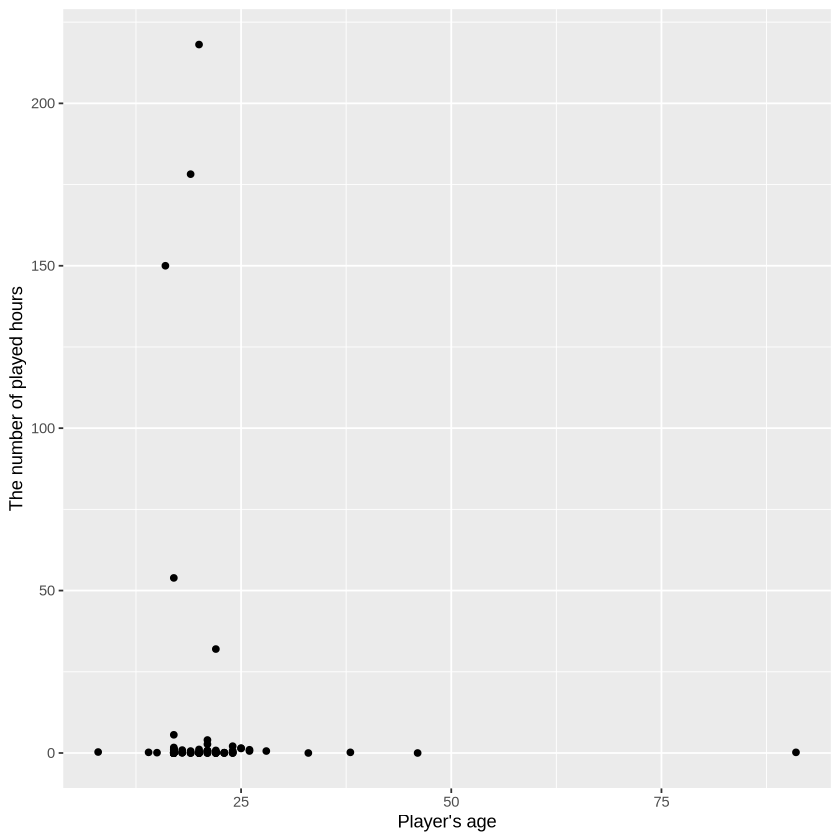

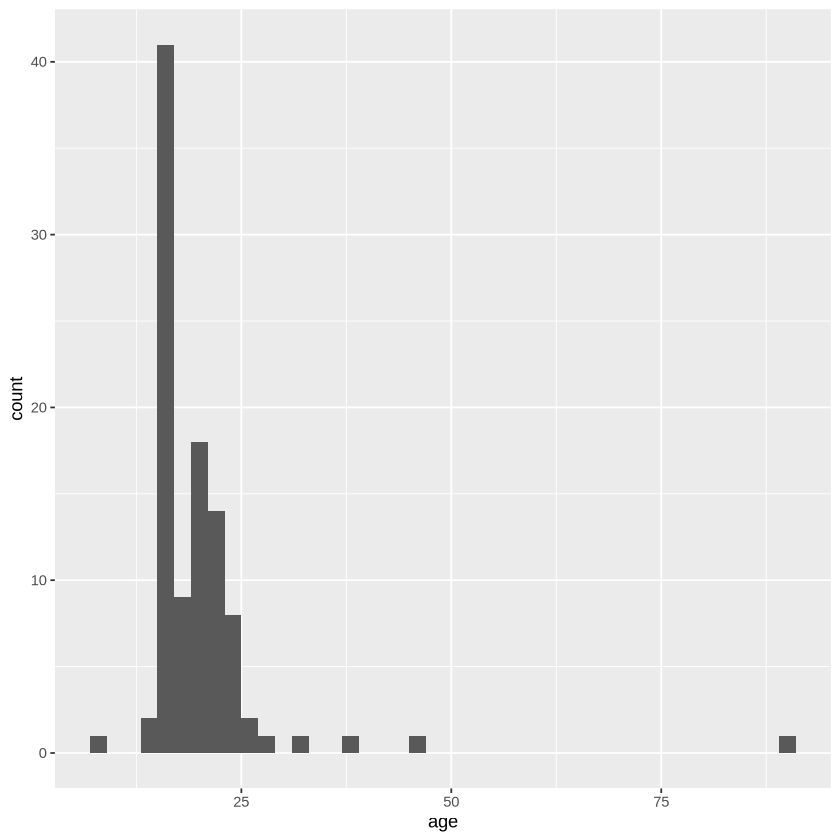

In [13]:
set.seed(123)
players_selected <- players_final |>
    select(age, experience, total_played_hours)

players_100 <- players_selected |>
    sample_n(100)
players_100

sample_plot <- players_100 |>
    ggplot(aes(x=age, y=total_played_hours))+
    geom_point()+
    xlab("Player's age")+
    ylab("The number of played hours")
sample_plot

age_distribution <- players_100 |>
    ggplot(aes(x = age)) +
    geom_histogram(binwidth = 2)
age_distribution
# i am not sure whether we should use binwidth = 3 to see a broader pattern or = 1 to see the precise one
# this cell is mostly for rough visualization prior to actuall regression

In [56]:
set.seed(123)
players_split <- initial_split(players_final, prop = 0.75, strata = total_played_hours)
players_training <- training(players_split)
players_testing <- testing(players_split)

In [57]:
set.seed(123)
players_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) |> 
      set_engine("kknn") |>
      set_mode("regression") 

players_recipe <- recipe(total_played_hours ~ age, data = players_training) |>
      step_scale(all_predictors()) |>
      step_center(all_predictors())
players_recipe

players_vfold <- vfold_cv(players_training, v = 3, strata = total_played_hours)

players_workflow <- workflow() |>
    add_recipe(players_recipe) |>
    add_model(players_spec)

players_workflow



── Recipe ──────────────────────────────────────────────────────────────────────



── Inputs 

Number of variables by role

outcome:   1
predictor: 1



── Operations 

• Scaling for: all_predictors()

• Centering for: all_predictors()



══ Workflow ════════════════════════════════════════════════════════════════════
Preprocessor: Recipe
Model: nearest_neighbor()

── Preprocessor ────────────────────────────────────────────────────────────────
2 Recipe Steps

• step_scale()
• step_center()

── Model ───────────────────────────────────────────────────────────────────────
K-Nearest Neighbor Model Specification (regression)

Main Arguments:
  neighbors = tune()
  weight_func = rectangular

Computational engine: kknn 


In [58]:
set.seed(123)
gridvals <- tibble(neighbors = seq(from = 1, to = 90, by = 5))

players_results <- players_workflow |>
    tune_grid(resamples = players_vfold, grid = gridvals) |>
    collect_metrics() |>

# added filter
    filter(.metric == "rmse")

players_results

neighbors,.metric,.estimator,mean,n,std_err,.config
<dbl>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
1,rmse,standard,30.75148,3,1.860363,Preprocessor1_Model01
6,rmse,standard,31.84631,3,1.687749,Preprocessor1_Model02
11,rmse,standard,31.78642,3,2.235327,Preprocessor1_Model03
⋮,⋮,⋮,⋮,⋮,⋮,⋮
76,rmse,standard,30.20892,3,1.853851,Preprocessor1_Model16
81,rmse,standard,30.10118,3,1.797084,Preprocessor1_Model17
86,rmse,standard,30.10455,3,1.801356,Preprocessor1_Model18


In [62]:
set.seed(123)

min_rmspe <- players_results |>
    filter(mean == min(mean))
   # filter(.metric == "rmse") |>
   # slice_min(mean, n = 1)
min_rmspe

neighbors,.metric,.estimator,mean,n,std_err,.config
<dbl>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
51,rmse,standard,30.07704,3,2.053388,Preprocessor1_Model11


In [63]:
set.seed(123)

k_min <- min_rmspe |>
         pull(neighbors)

best_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = k_min) |>
         set_engine("kknn") |>
         set_mode("regression")

best_fit <- workflow() |>
         add_recipe(players_recipe) |>
         add_model(best_spec) |>
         fit(data = players_training)

players_summary <- best_fit |>
          predict(players_testing) |>
          bind_cols(players_testing) |>
          metrics(truth = total_played_hours, estimate = .pred)
players_summary

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
rmse,standard,22.21129760
rsq,standard,0.03796718
mae,standard,9.98262745


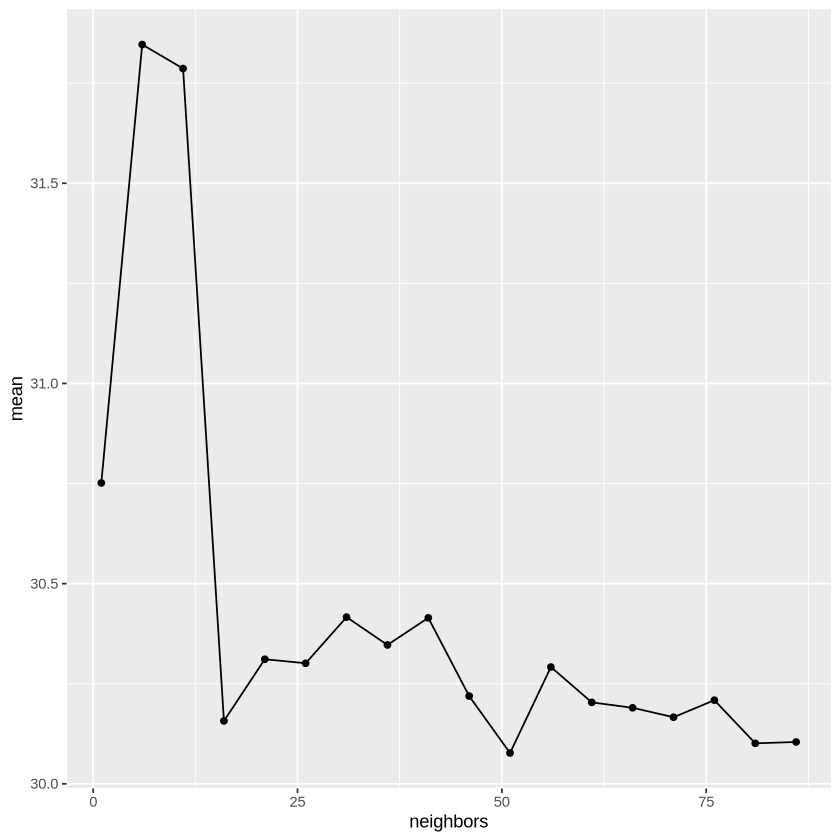

In [66]:
#verifying that lowest is indeed k = 51

test <- players_results |>
    ggplot(aes(x = neighbors, y = mean)) +
    geom_point() +
    geom_line()

test